# Tutorial: Data Cleansing and the Tidyverse

This lab serves as an introduction to data processing in R using the `tidyverse` family of packages. We cover a lot of material in this tutorial, and recommend coming back to use this as a reference while you learn the `tidyverse` ropes.

## Goals:
* Learn how to use `tidyverse`
* Learn about the pipe operator
* Learn various data transformations in R

---
# Getting started

For many people, their first instinct when it comes to data cleansing is to open their data with Excel and just start manually cleaning it up by replacing values, creating new columns, etc. The problem with that approach is that you cannot easily replicate the steps you have taken to transform the raw data into the final format you use for your analyses. This issue has many consequences, but among the two most common are, first, that if you get new or additional data from the same source, you would have to manually perform the same operations again, and second, if you make a mistake it would be difficult to identify where exactly that happened. The best approach is to preprocess your data with a script in the same way you do your analyses. However, doing so in base R can be quite cumbersome. In this tutorial, you will learn how to use tools for the **`tidyverse`** packages. Tidyverse is a collection of useful packages, which include **`ggplot2`**, **`tidyr`**, **`dplyr`**, etc, combined in a single package.

Before we begin, you'll need to install and load the `tidyverse` package:

In [3]:
#install.packages('tidyverse')
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Data 

We will use the `iris` dataset for illustrating the tidyverse functions. We'll save it to a `dat` variable like this so we can make changes to it:

In [5]:
dat <- iris
head(dat)

?iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The `iris` dataset contains [measurement data](https://eloquentarduino.github.io/2019/12/iris-classification-on-arduino/) for different species of iris flowers. You can view a detailed description of the dataset by typing:
```
?iris
```

---
# A standardized grammar
One of the reasons that the tidyverse is so popular for data manipulation and analysis is that it uses a **standardized grammar** across all of its packages. This means that it's really easy to make different functions talk to each other, and function options or additional arguments all match the same style so they're easier to remember.

In the tidyverse, the first argument of a function is always the **object** that you want to perform the given function on. For example,

```
mutate(data, var1 = c(1, 2, 3, 4))
```
would take the data frame `data`, and add a new column called `var1` consisting of the given vector.

This object-as-first-argument style is really helpful when you want to perform a series of functions on the same object.

Another feature of the tidyverse is that most functions use something called **tidy evaluation**. This means that when you are calling a variable within the function, you typically don't need to specify which dataframe it is located in. So instead of doing:
```
select(data, c(data$var1, data$var2))
```

You can just do:
```
select(data, c(var1, var2))
```
And it will know to look for `var1` and `var2` in the `data` object. This helps streamline code.

## Pipes: the %>% operator

You might have noticed the weird **`%>%`** operator in the code in prior tutorials. This operator is called a **'pipe'**. Pipes are present in many programming languages, but not in the base R, so you might not be familiar with them. Pipes are an added feature from the Tidyverse package. 

A pipe serves as a link between two objects, whether they be variables or functions. The pipe tells R to take the object on its left side and pass it as the first argument to the function on the right. This is where the object-as-first-argument style really matters -- it's easy to pipe the output of one tidyverse function straight in as the input of the next, becuase the data object is always the first argument.

Typically in R, if you want to pass an argument to a function, you specify it as `function(argument)`. For example, if you want to find the mean of the iris `Sepal.Width`, in base R you would do this:

In [ ]:
mean(iris$Sepal.Width)

[1] 3.057333

If you use a pipe, you just put the argument on its left side, and the function on the right, i.e., `variable  %>% function()`:

In [ ]:
iris$Sepal.Width %>% mean()

[1] 3.057333

Now, you might be asking, why would you want to use **x %>% mean()** instead of **mean(x)**? Pipes are most useful when you have to run a series of functions on the same input. For example, let's say you want to find the mean of the observations, and then round the value to 2 significant digits. In base R, you can do this in two ways:

1. nest the functions within one another
2. assign a temporary variable for the mean, and then round that value

In [ ]:
# nested
round(mean(iris$Sepal.Width), 2)

# tmp variable
obs_mean = mean(iris$Sepal.Width)
round(obs_mean, 2)

[1] 3.06

[1] 3.06

Since pipes take the output of the expression on the left and send it as the first input to the expression on the right, you can do the following with pipes:

In [ ]:
# with pipes
iris$Sepal.Width %>% 
    mean() %>% 
    round(2)

[1] 3.06

This reads smoothly from left to right as, "Take the observations, find the mean, and then round it to two decimals." 

Note that it's best practice to start a new row after each pipe operator, with the following functions indented.

`round()` is not a tidyverse function, but notice that it also takes as first argument the **value** to be rounded, and as a second argument the number of digits to which to round. When you use a pipe, the first argument is implicitly filled in with the value on the left, so the first argument you actually type corresponds to the number of significant digits to which to round. 

This is the magic of the tidyverse pipe. As we'll see with our tidyverse functions below, you often want to use many of them, all in a row, on the same data object. While the above example might be easy to read in its nested form, it becomes very difficult to track what is going on with this approach as your code gets more complex. 

**Thus pipes have two advantages:**

1. **Readability** - it is easier to see what goes on, because you can track the sequence naturally top to bottom. In contrast, with nested functions, you have to identify the inner-most function and then work your way outwards.
2. **Efficiency** - you won't clutter your environment with temporary variables that you needed for only one intermediary observation.

Because the pipe is so annoying to type, there is a handy keyboard shortcut:

**Mac**: shift + command + M

**PC**: shift + control + M

---
# Transforming data with tidyverse functions

Below is a summary of the functions we will review and their general description. These functions come from the `dplyr` package, the `tidyr` package, and the `purrr` package:

* **`mutate()`** - transform existing variables and create new variables
* **`summarise()`** - summarize variables
* **`filter()`** - filter rows based on a condition
* **`select()`** - select columns to keep/remove
* **`arrange()`** - sort by column/columns
* **`unite()`** - combine two columns into one
* **`separate()`** - split one column into multiple columns
* **`*_join()`** - merge multiple dataframes
* **`group_by()`** - implicitly group data
* **`nest()`** - explicitly group data
* **`map()`** - perform the same function on each element of list or vector
* **`pivot_wider()`** - transform data to wide format (formerly `spread()`)
* **`pivot_longer()`** - transform data to long format (formerly `gather()`)

## `mutate()`: Transform existing variables and create new variables

`mutate()` is part of `dplyr`, one of the packages included in `tidyverse` that is handy for data manipulation. The `mutate()` command allows you to create new columns, i.e. new variables.  Let's say you want to center the sepal lengths in the `iris` dataset by subtracting the mean:

In [6]:
dat <- dat  %>%  #need to reassign the dat object with our new changes
    mutate(centered_SepLen = Sepal.Length - mean(Sepal.Length))

head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333
2,4.9,3.0,1.4,0.2,setosa,-0.9433333
3,4.7,3.2,1.3,0.2,setosa,-1.1433333
4,4.6,3.1,1.5,0.2,setosa,-1.2433333
5,5.0,3.6,1.4,0.2,setosa,-0.8433333
6,5.4,3.9,1.7,0.4,setosa,-0.4433333


Notice the tidy evaluation here -- we only need to indicate the dataset on the very first line. Within `mutate`, it knows to look for those variables in `dat`. 

If you want to create several variables in base R (that is, without using `dplyr` functions), you would have to do this everytime:

In [ ]:
# center sepal length
dat$centered_SepLen = dat$Sepal.Length - mean(dat$Sepal.Length) 
# transforms petal length into zscores
dat$PetLen_zscores = (dat$Petal.Length - mean(dat$Petal.Length))/sd(dat$Petal.Length)

Using `dplyr`, you don't have to write `dat$` every time you refer to a variable:

In [7]:
dat <- dat  %>%  
    mutate(centered_SepLen = Sepal.Length - mean(Sepal.Length),  # center Sepal Lengths
           PetLen_zscores = (Petal.Length - mean(Petal.Length))/sd(Petal.Length),  # zscore the Petal Lengths
           n_flowers = length(Species))              # calculate the total number of flowers
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


As you see, you can create multiple variables at the same time within a single `mutate` command, by separating them with commas. It's best practice to start each new variable on a new line to maintain readability.

## `summarise()`: Summarize variables

`Mutate()` creates new variables within the existing dataset and does not change the number of rows. You might also want to calculate statistics that summarize the whole data set. In the example above I calculated how many flowers were measured total (`n_flowers`) - but it doesn't really make sense to output this as a variable with entries for every observation. If you want to create a new data.frame in which you store the summary values for one or more variables, you can use the `summarise()` command. 

Let's get summaries for a few of the existing variables:

In [8]:
smry <- dat  %>% #creating new smry object
    summarise(n_flowers = length(Species), #how many observations (flowers) are there total? 
              shortSepal_prop = mean(centered_SepLen < 0), #what prop. have smaller-than-average sepal length?
              setosa_prop = mean(Species == 'setosa'), #what prop. of measured flowers are species Setosa?
              SepLen_mean = mean(Sepal.Length), #mean sepal length
              SepLen_sd = sd(Sepal.Length), #standard deviation of sepal length
              SepLen_se = SepLen_sd / sqrt(n_flowers)
              )
smry

n_flowers,shortSepal_prop,setosa_prop,SepLen_mean,SepLen_sd,SepLen_se
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150,0.5333333,0.3333333,5.843333,0.8280661,0.06761132


Notice that when you get to a new row, you can refer to a variable you have already created on a previous row. (The same is true in `mutate`.) For example, when we calculate the standard error for `Sepal.Length`, we have put `SepLen_se = SepLen_sd / sqrt(n_flowers)`, in which SepLen_sd and n_flowers do not exist in the original data.frame, but are variables that we created on previous rows. We could have written it directly as `SepLen_se = sd(Sepal.Length) / sqrt(length(Species))`, but doing it in the above way is more efficient and readable.

## `filter()`: Filter rows based on a condition

Here are three scenarios:
* you find that there was an error with data collection for one species of flower (e.g. setosa) and you want to remove it from the data.frame
* you find out that some flowers have a negative `Sepal.Length` value, which is an error, and you want to remove them
* you want to separate the data for the remaining two species into separate datasets

You can do all of these things with the **`filter`** command, which uses a logical argument to identify subsets of rows (observations). Rows for which the logical is TRUE will be retained in the data frame, and all others will be removed:

In [9]:
print(paste('species options:',paste(levels(dat$Species),collapse=", ")))

# get rid of all setosa flowers and any flowers with negative sepal lengths
cleaned_dat <- dat  %>% 
    filter(Species != 'setosa', #!= is read "not equal to"
           Sepal.Length >= 0)

# make new data.frames for the remaining two species
versi.dat <- filter(cleaned_dat, Species == 'versicolor')
virgi.dat <- filter(cleaned_dat, Species == 'virginica')

# look at first six rows of all three data.frames
head(cleaned_dat); head(versi.dat); head(virgi.dat)

[1] "species options: setosa, versicolor, virginica"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,7.0,3.2,4.7,1.4,versicolor,1.1566667,0.5336209,150
2,6.4,3.2,4.5,1.5,versicolor,0.5566667,0.4203256,150
3,6.9,3.1,4.9,1.5,versicolor,1.0566667,0.6469162,150
4,5.5,2.3,4.0,1.3,versicolor,-0.3433333,0.1370873,150
5,6.5,2.8,4.6,1.5,versicolor,0.6566667,0.4769732,150
6,5.7,2.8,4.5,1.3,versicolor,-0.1433333,0.4203256,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,7.0,3.2,4.7,1.4,versicolor,1.1566667,0.5336209,150
2,6.4,3.2,4.5,1.5,versicolor,0.5566667,0.4203256,150
3,6.9,3.1,4.9,1.5,versicolor,1.0566667,0.6469162,150
4,5.5,2.3,4.0,1.3,versicolor,-0.3433333,0.1370873,150
5,6.5,2.8,4.6,1.5,versicolor,0.6566667,0.4769732,150
6,5.7,2.8,4.5,1.3,versicolor,-0.1433333,0.4203256,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,6.3,3.3,6.0,2.5,virginica,0.45666667,1.2700404,150
2,5.8,2.7,5.1,1.9,virginica,-0.04333333,0.7602115,150
3,7.1,3.0,5.9,2.1,virginica,1.25666667,1.2133927,150
4,6.3,2.9,5.6,1.8,virginica,0.45666667,1.0434497,150
5,6.5,3.0,5.8,2.2,virginica,0.65666667,1.1567451,150
6,7.6,3.0,6.6,2.1,virginica,1.75666667,1.6099263,150


Here's where the pipe becomes useful. Let's say you want to calculate the summaries we described above separately for the versicolor and virginica species. I will show you later how to do it more efficiently, but for the moment we can illustrate how you can chain commands with pipes. Rather than creating the intermediate `versi.dat` and `virgi.dat` dataframes, we can chain the `summarise` function after the `filter` function. In the example below, we pass `dat` as the first argument of `filter`, then specify to keep only versicolor flowers, and then the resulting data.frame is passed on as the first argument to `summarise`:

In [10]:
# calculate summarise for versicolor species
dat  %>% 
 filter(Species == 'versicolor')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

# calculate summarise for virginica species
dat  %>% 
 filter(Species == 'virginica')  %>% 
 summarise(SepLen_mean = mean(Sepal.Length),
           SepLen_sd = sd(Sepal.Length))

SepLen_mean,SepLen_sd
<dbl>,<dbl>
5.936,0.5161711


SepLen_mean,SepLen_sd
<dbl>,<dbl>
6.588,0.6358796


**_TIP_**: it is very easy to remove missing values by using the `!is.na(variable)` command. E.g. if some flowers are missing petal length measurements, you can exclude them by doing **`filter(dat, !is.na(Petal.Length))`**

## `select()`: Select columns to keep/remove

Often the dataset contains many irrelevant columns that make it difficult to display the dataframe all at once. You can easily choose which columns to keep or remove in a data.frame with the **`select()`** command. It has complex usage, and I suggest checking the help, i.e. type `?select`. However, the basic usage is as follows: 

In [ ]:
dat  %>% 
    select(Species, Petal.Length, Petal.Width) %>%
    head() 

,Species,Petal.Length,Petal.Width
,<fct>,<dbl>,<dbl>
1,setosa,1.4,0.2
2,setosa,1.4,0.2
3,setosa,1.3,0.2
4,setosa,1.5,0.2
5,setosa,1.4,0.2
6,setosa,1.7,0.4


If you want to **remove** only specific variables, list each with a **-** sign:

In [ ]:
#remove original petal length & width variables
dat  %>% 
    select(-Petal.Length, -Petal.Width) %>%
    head()  

,Sepal.Length,Sepal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,setosa,-0.4433333,-1.165809,150


If you want to keep a sequence of variables, you can specify the first and the last using a range. Note that this will be an inclusive range, so the first and last variables will be included in your selection:

In [ ]:
# look at full data set to see order
head(dat)

# look at just a certain range of variables
dat  %>% 
    select(Sepal.Length:Species) %>%
    head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


The tidyverse also has something called **tidy selection** which makes it easy to "batch" select based on patterns in variable names. For example, we can use `starts_with()` to select all columns starting with "Petal":

In [ ]:
dat  %>% 
    select(starts_with("Petal")) %>% 
    head()

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
6,1.7,0.4


Other selection helpers include `ends_with()`, `contains()`, `matches()` and `num_range()`. Learn more with `?tidyselect::ends_with()`.

## `arrange()`: Sort by columns

If you want to sort your data.frame by one or more columns you can use the `arrange()` command, where you list the variables in the order in which you want the sorting to occur. The default is to sort by ascending order for each variable. If you want to sort by descending order for one of them, you can surround the variable in the `desc()` command. Let's sort the flowers by species, and then within each species, by descending petal length:

In [ ]:
dat %>% 
    arrange(Species, desc(Petal.Length)) %>%
    head()

#levels(dat$Species)
#dat  %>% 
#    arrange(desc(Species), desc(Petal.Length)) %>%
#    head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
1,4.8,3.4,1.9,0.2,setosa,-1.0433333,-1.052513,150
2,5.1,3.8,1.9,0.4,setosa,-0.7433333,-1.052513,150
3,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150
4,5.7,3.8,1.7,0.3,setosa,-0.1433333,-1.165809,150
5,5.4,3.4,1.7,0.2,setosa,-0.4433333,-1.165809,150
6,5.1,3.3,1.7,0.5,setosa,-0.7433333,-1.165809,150


Note: since the `Species` variable is a factor, not a numeric variable, it will be sorted by the order listed by `levels(dat$Species)`. You can test this out by uncommenting the second line in the code cell above - since the flowers are now sorted in the reverse `Species` order, the first six rows shown by `head()` are now virginica, not setosa. 

## `unite()`: Combine two columns into one

Let's say flowers with short petals are fundamentally different from those with long petals. I'm going to make a new categorical variable, `PetalType`, that can either be "long" or "short". *To learn more about the `if_else()` function used below, type `?if_else`.*

In [12]:
dat <- dat  %>%  
    mutate(PetalType = if_else(Petal.Length > mean(Petal.Length),"long","short"))

head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa,-0.4433333,-1.165809,150,short


Right now `Species` and `PetalType` are two different variables. Let's say for some reason you want a new variable that specifies both, e.g. 'short virginica', 'long setosa', etc. This is often useful when you are plotting and you want to use a color to denote each combination of two variables, instead of using a combination of colors and shapes. 

You can combine variables with the `unite()` command, which takes the arguments `unite(new_var, input1, input2)`. The `remove = FALSE` means it won't remove the two input variables. This is set to `TRUE` by default.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Combined_var,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa_short,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa_short,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa_short,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa_short,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa_short,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa_short,setosa,-0.4433333,-1.165809,150,short


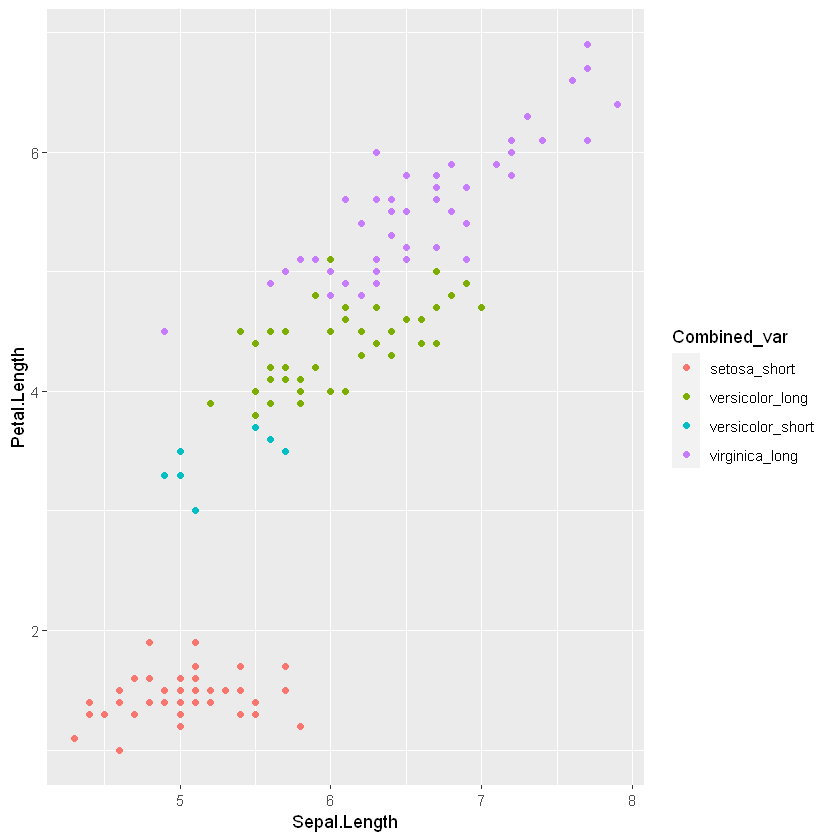

In [13]:
dat <- dat %>% 
      unite(Combined_var, Species, PetalType, remove=FALSE)
head(dat)

ggplot(dat, aes(Sepal.Length, Petal.Length, color = Combined_var))+ geom_point(size = 1.5)

With `unite()`, you can also specify the separator (by default it is '\_') and whether to remove the original variables. Check the help section for more on how to do this (`?unite`).

## `separate()`: Split one column into multiple columns

The reverse of the operation above is called `separate()`. It becomes useful, for example, if you have the name of participants stored in one variable, but you want to separate it into First and Last name. For the illustration, I will just reverse the above example (adding 1 to the new variables, to distinguish them from the existing Species and PetalType variables):

In [14]:
dat <- dat  %>% 
    separate(Combined_var, into=c('Species1', 'PetalType1'))
head(dat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species1,PetalType1,Species,centered_SepLen,PetLen_zscores,n_flowers,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<int>,<chr>
1,5.1,3.5,1.4,0.2,setosa,short,setosa,-0.7433333,-1.335752,150,short
2,4.9,3.0,1.4,0.2,setosa,short,setosa,-0.9433333,-1.335752,150,short
3,4.7,3.2,1.3,0.2,setosa,short,setosa,-1.1433333,-1.392399,150,short
4,4.6,3.1,1.5,0.2,setosa,short,setosa,-1.2433333,-1.279104,150,short
5,5.0,3.6,1.4,0.2,setosa,short,setosa,-0.8433333,-1.335752,150,short
6,5.4,3.9,1.7,0.4,setosa,short,setosa,-0.4433333,-1.165809,150,short


Like with `unite()`, you can specify the character you want `separate()` to split. For example, splitting at " " instead of at the default "_" for the First, Last name example. See `?separate` for more info.

## `group_by()`: Implicitly group data

In the filtering example in section 4.3, we saw how to subset the data.frame separately for different species, and then to calculate the summaries. This is inefficient and also creates two separate data.frames. While you can join them manually afterwards, there is a much easier way with the **`group_by`** command.

When you pass a data.frame to a **`group_by`** command, you can specify names of variables, by which to split the data.frame. For example, if we specify the `Species` and `PetalType` variables in the group_by command, the data.frame will be **_implicitly_** split into 4 data.frames - one for each combination of species and petal type.  E.g.:

In [15]:
dat %>% 
    group_by(Species, PetalType) %>%
    print()

# A tibble: 150 × 11
# Groups:   Species, PetalType [4]
   Sepal.Length Sepal.…¹ Petal…² Petal…³ Speci…⁴ Petal…⁵ Species cente…⁶ PetLe…⁷
          <dbl>    <dbl>   <dbl>   <dbl> <chr>   <chr>   <fct>     <dbl>   <dbl>
 1          5.1      3.5     1.4     0.2 setosa  short   setosa   -0.743   -1.34
 2          4.9      3       1.4     0.2 setosa  short   setosa   -0.943   -1.34
 3          4.7      3.2     1.3     0.2 setosa  short   setosa   -1.14    -1.39
 4          4.6      3.1     1.5     0.2 setosa  short   setosa   -1.24    -1.28
 5          5        3.6     1.4     0.2 setosa  short   setosa   -0.843   -1.34
 6          5.4      3.9     1.7     0.4 setosa  short   setosa   -0.443   -1.17
 7          4.6      3.4     1.4     0.3 setosa  short   setosa   -1.24    -1.34
 8          5        3.4     1.5     0.2 setosa  short   setosa   -0.843   -1.28
 9          4.4      2.9     1.4     0.2 setosa  short   setosa   -1.44    -1.34
10          4.9      3.1     1.5     0.1 setosa  shor

Now, the key is that the split is implicit - as you can see above, we still only have one data.frame, but now it has the specification:

`# Groups:   Species, PetalType [4]`

Every function that you add after `group_by()` will be evaluated separately for each group, and then the results will be combined. Let's say you want to calculate the mean and sd for `Sepal.Length` and `Sepal.Width` separately for the four groups:

In [ ]:
dat  %>% 
    group_by(Species, PetalType)  %>% 
    summarise(SepLen_mean = mean(Sepal.Length),
              SepLen_sd = sd(Sepal.Length),
              SepWid_mean = mean(Sepal.Width),
              SepWid_sd = sd(Sepal.Length))


`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


Species,PetalType,SepLen_mean,SepLen_sd,SepWid_mean,SepWid_sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,short,5.006000,0.3524897,3.428000,0.3524897
versicolor,long,6.046512,0.4537405,2.823256,0.4537405
versicolor,short,5.257143,0.3309438,2.442857,0.3309438
virginica,long,6.588000,0.6358796,2.974000,0.6358796


And that's all the code you need. If you have tried to do something like this in base R (i.e., without `dplyr` commands), you know how involved it is! `dplyr` can make your code **much** cleaner. What is going on behind the scenes is that the data.frame is separated into multiple data.frames, one for each combination of variables. Then the `summarise` function is executed on each, and the resulting 4 data.frames are automatically combined into a new resulting data.frame.

Note that you can ungroup using `ungroup()`.

The `group_by` command works not only with `summarise`, but also with `mutate`. While with `summarise` it creates a new data.frame with summary results, with `mutate` it creates a new variable that is calculated separately for each group, and then combined into the final data.frame. This is useful, when, for example, we want to standardize variables within groups. Earlier we saw how to subtract the overall mean of `Sepal.Length` to center a variable. Let's say that we want to subtract the mean `Sepal.Length` of each species only from the flowers in that species. So, for our example we can do:

In [ ]:
dat_centered  <- dat  %>% 
 #center values by mean for all data:
 mutate(SepLen_centered_overall = Sepal.Length - mean(Sepal.Length)) %>% 
 group_by(Species)  %>% 
 #center values by mean for each species:
 mutate(SepLen_centered_byspecies = Sepal.Length - mean(Sepal.Length)) %>% 
 #just show the relevant variables (there are a lot of variables in this data.frame now!):
 select(Species, SepLen_centered_overall:SepLen_centered_byspecies)

head(dat_centered)

Species,SepLen_centered_overall,SepLen_centered_byspecies
<fct>,<dbl>,<dbl>
setosa,-0.7433333,0.094
setosa,-0.9433333,-0.106
setosa,-1.1433333,-0.306
setosa,-1.2433333,-0.406
setosa,-0.8433333,-0.006
setosa,-0.4433333,0.394


The second column above gives us the sepal lengths centered over the whole sample, while the third line gives us the sepal lengths centered separately for each species. To illustrate, I will plot the means for each species under the two centerings (don't worry about the code if you don't know `ggplot2` yet):

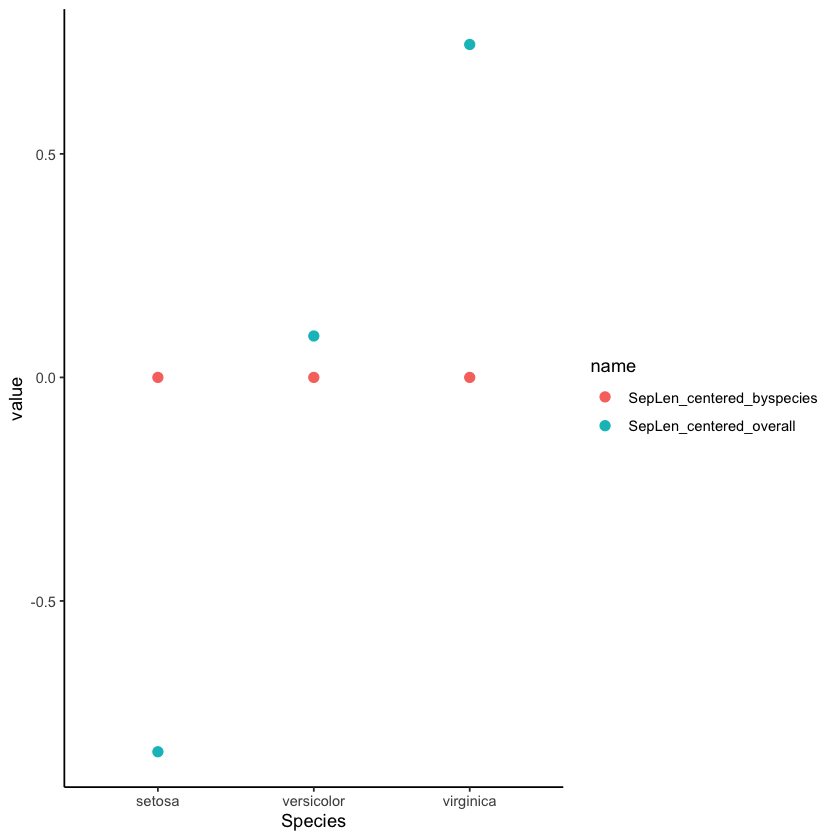

In [ ]:
dat_centered %>% 
    pivot_longer(c(SepLen_centered_overall, SepLen_centered_byspecies)) %>% 
    ggplot(aes(Species, value, color=name)) +
    stat_summary(geom='point',fun=mean, size = 2.5) +
    theme_classic()

This plot makes sense, because if you're calculating `SepLen_centering_byspecies` by subtracting the species mean from each `Sepal.Length` value, the mean of the new values should be 0 for every species. Meanwhile, the `SepLen_centering_overall` values were calculated by subtracting the same amount from all `Sepal.Length` values, regardless of species, so we still see variation for these means across species.

There are a lot of other handy uses for `group_by`, which will be covered in future tutorials. 

## `nest()`: Explicitly group data

Whereas `group_by()` implicitly groups data, `nest()` **explicitly** groups data. That is, it takes the subset of data associated with a certain grouping, and *nests* it within a single cell. That's right, it puts a whole data frame (ok technically a tibble) in a single cell.

Replicating our example from above:

In [ ]:
#Initial dataframe
nested  <- dat  %>% 
    select(c(Sepal.Length:Petal.Width, Species, PetalType))
head(nested)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PetalType
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa,short
2,4.9,3.0,1.4,0.2,setosa,short
3,4.7,3.2,1.3,0.2,setosa,short
4,4.6,3.1,1.5,0.2,setosa,short
5,5.0,3.6,1.4,0.2,setosa,short
6,5.4,3.9,1.7,0.4,setosa,short


In [ ]:
#nesting
nested %>% 
    nest(data = c(Sepal.Length:Petal.Width, PetalType)) %>% 
    print

# A tibble: 3 × 2
  Species    data             
  <fct>      <list>           
1 setosa     <tibble [50 × 5]>
2 versicolor <tibble [50 × 5]>
3 virginica  <tibble [50 × 5]>


In this example, we had to specify in the `data =` argument which columns we wanted to nest. Because we **left out** "Species", this became our grouping variable, with all other data getting nested under the new `data` column.

Now in the `data` column we have a 50 x 5 tibble for each species of iris. Let's see what's really in cell [1, 2]:

In [ ]:
nested %>% 
    nest(data = c(Sepal.Length:Petal.Width, PetalType)) %>% 
    pull(data) %>% #tidyverse version of $ -- selecting data column
    first()  %>%  #pulling first row
    head() #just top 6 lines

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,PetalType
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,short
4.9,3.0,1.4,0.2,short
4.7,3.2,1.3,0.2,short
4.6,3.1,1.5,0.2,short
5.0,3.6,1.4,0.2,short
5.4,3.9,1.7,0.4,short


So we can see that a whole other tibble is comfortably waiting for us in a single cell!

If we leave out both "Species" and "PetalType" from the `data = ` argument, we get more nests. This is analogous to grouping by multiple variables:

In [ ]:
nested %>% 
    nest(data = c(Sepal.Length:Petal.Width)) %>% #re-nesting with different variables
    print()

# A tibble: 4 × 3
  Species    PetalType data             
  <fct>      <chr>     <list>           
1 setosa     short     <tibble [50 × 4]>
2 versicolor long      <tibble [43 × 4]>
3 versicolor short     <tibble [7 × 4]> 
4 virginica  long      <tibble [50 × 4]>


You can even combine `group_by()` with `nest()` to streamline the variable selection. The below will nest all variables **aside from** the `group_by()` variable:

In [ ]:
nested  %>% 
    group_by(Species) %>% 
    nest() %>% 
    print()

# A tibble: 3 × 2
# Groups:   Species [3]
  Species    data             
  <fct>      <list>           
1 setosa     <tibble [50 × 5]>
2 versicolor <tibble [50 × 5]>
3 virginica  <tibble [50 × 5]>


Note that any variables supplied to the `nest()` function above would override the `group_by()` variables.

So what is the difference between using `group_by()` versus `nest()`? For most of your operations, `group_by()` will probably be your go-to. However, `nest()` comes into play when the operations you need to perform over each group require a data frame as input (e.g., models). We'll see some examples of this below with `map()`.

## `map()`: Perform same function on each element of list or vector

`map()` works by applying a given function across different elements of a list or vector. If you are familiar with `for` loops, this is conceptually similar to looping a function over, e.g., lines of data. However, `map()` is *vectorized*. This is a fancy way of saying it's implemented using a lower-level programming language. This makes it more efficient than loops.

(Note: `map` operates basically the same as the `*apply` family of functions (e.g., `lapply()`, `sapply`, etc.) but since `map` is part of the tidyverse, it plays better with tidyverse grammar and is more standardized.)

`map()` and `nest()` work really well together. Here, we'll use them to fit a model for different subgroups and then extract the results of all our models. 

We'll use our nested data frame from above, with both Species and PetalType as nesting factors:

In [ ]:
nested  <- nested %>% 
    group_by(Species, PetalType) %>% 
    nest() %>% 
    print()

# A tibble: 4 × 3
# Groups:   Species, PetalType [4]
  Species    PetalType data             
  <fct>      <chr>     <list>           
1 setosa     short     <tibble [50 × 4]>
2 versicolor long      <tibble [43 × 4]>
3 versicolor short     <tibble [7 × 4]> 
4 virginica  long      <tibble [50 × 4]>


`map` takes the form:
```
map(data, function)
```
`data` is a list/vector. We want our function to apply to each element of this list/vector.

`function` can be a pre-existing function, or we can create a short custom function right within `map` using what we learned in our tutorial on writing functions.

Here, we'll fit a linear model to predict Sepal.Length from Petal.Length:

In [ ]:
nested_lm  <- nested  %>% 
    mutate(model_fit = map(data, #column name in nested df
                           function(nest_df) lm(Sepal.Length ~ Petal.Length, data=nest_df))) 

print(nested_lm)

# A tibble: 4 × 4
# Groups:   Species, PetalType [4]
  Species    PetalType data              model_fit
  <fct>      <chr>     <list>            <list>   
1 setosa     short     <tibble [50 × 4]> <lm>     
2 versicolor long      <tibble [43 × 4]> <lm>     
3 versicolor short     <tibble [7 × 4]>  <lm>     
4 virginica  long      <tibble [50 × 4]> <lm>     


Note that in this case, the first `data` argument of `map` refers to the name of our nested column in our dataset. However within the function, `data = ` is a built-in argument for the `lm` function.

We can see we've added another column in which each cell contains the specified linear model. Let's see what that really looks like! (This code just pulls the top two lines of the lm object):

In [ ]:
nested_lm %>%  
    pull(model_fit) %>% #tidyverse version of $ -- selecting model_fit column
    first()  %>%  #pulling first row
    head(2) #just top 2 lines of nested df

$coefficients
 (Intercept) Petal.Length 
   4.2131682    0.5422926 

$residuals
          1           2           3           4           5           6 
 0.12762214 -0.07237786 -0.21814860 -0.42660712  0.02762214  0.26493436 
          7           8           9          10          11          12 
-0.37237786 -0.02660712 -0.57237786 -0.12660712  0.37339288 -0.28083638 
         13          14          15          16          17          18 
-0.17237786 -0.50969008  0.93608066  0.67339288  0.48185140  0.12762214 
         19          20          21          22          23          24 
 0.56493436  0.07339288  0.26493436  0.07339288 -0.15546082 -0.03506564 
         25          26          27          28          29          30 
-0.44352416 -0.08083638 -0.08083638  0.17339288  0.22762214 -0.38083638 
         31          32          33          34          35          36 
-0.28083638  0.37339288  0.17339288  0.52762214 -0.12660712  0.13608066 
         37          38          39          40          41          42 
 0.58185140 -0.07237786 -0.51814860  0.07339288  0.08185140 -0.41814860 
         43          44          45          46          47          48 
-0.51814860 -0.08083638 -0.14352416 -0.17237786  0.01916362 -0.37237786 
         49          50 
 0.27339288  0.02762214

Super ugly, but there's (part of) our model! 

Now, using what we learned in our tutorial on data objects, we can extract interesting information from each of these nested models. Here we create yet another nested column, where each cell holds the coefficients for the respective model.

In [ ]:
nested_lm <- nested_lm  %>% 
        mutate(coef = map(model_fit, #now iterating over "model_fit" instead of "data"
                      #a function to create data frame of coef names/values:
                      function(fit) data.frame(name = names(fit$coefficients), 
                                               beta = fit$coefficients)))
print(nested_lm)

# A tibble: 4 × 5
# Groups:   Species, PetalType [4]
  Species    PetalType data              model_fit coef        
  <fct>      <chr>     <list>            <list>    <list>      
1 setosa     short     <tibble [50 × 4]> <lm>      <df [2 × 2]>
2 versicolor long      <tibble [43 × 4]> <lm>      <df [2 × 2]>
3 versicolor short     <tibble [7 × 4]>  <lm>      <df [2 × 2]>
4 virginica  long      <tibble [50 × 4]> <lm>      <df [2 × 2]>


Finally, we can unnest the columns we're interested in. 

In [ ]:
nested_lm  <- nested_lm  %>% 
        unnest(coef)

print(nested_lm)

# A tibble: 8 × 6
# Groups:   Species, PetalType [4]
  Species    PetalType data              model_fit name          beta
  <fct>      <chr>     <list>            <list>    <chr>        <dbl>
1 setosa     short     <tibble [50 × 4]> <lm>      (Intercept)  4.21 
2 setosa     short     <tibble [50 × 4]> <lm>      Petal.Length 0.542
3 versicolor long      <tibble [43 × 4]> <lm>      (Intercept)  2.28 
4 versicolor long      <tibble [43 × 4]> <lm>      Petal.Length 0.858
5 versicolor short     <tibble [7 × 4]>  <lm>      (Intercept)  2.30 
6 versicolor short     <tibble [7 × 4]>  <lm>      Petal.Length 0.865
7 virginica  long      <tibble [50 × 4]> <lm>      (Intercept)  1.06 
8 virginica  long      <tibble [50 × 4]> <lm>      Petal.Length 0.996


A few things to notice here. First, we went from a 4 x 6 tibble to an 8 x 6 tibble, because each Species/PetalType combination now has two rows instead of just one. Second, our `data` and `model_fit` columns are still nested. And we can clearly see that the link between Petal.Length and Sepal.Length differs based on which Species/PetalType combo we're looking at!

You can find additional information on this approach here: http://omaymas.github.io/Climate_Change_ExpAnalysis/

---
# Restructuring data.frames: long to wide, wide to long, and merging

Recall that **long data** means we have one row for each observation, while **wide data** has one row for each subject.

In this section we'll use the `dplyr` functions `pivot_longer` (formerly `gather`) and `pivot_wider` (formerly `spread`) to switch between short and long forms of the data. We'll also try out combining data.frames using the `*_join` family of functions. 

The `iris` data set has multiple measurements per row, so it is currently in the "wide" format. To put it in long format, we can make each row only have one measurement, and then add a variable that specifies whether that measurment is for "sepal" or "petal", "length" or "width". 

We'll start by making a new duplicate of the `iris` dataset so we don't have to deal with all the messy variables we created. We'll aslo add an ID, `flower.num` so we can keep things in order while we restructure.

In [ ]:
newdat <- iris # new duplicate
newdat$flower.num <- 1:nrow(newdat) # add ID
head(newdat)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,flower.num
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,3
4,4.6,3.1,1.5,0.2,setosa,4
5,5.0,3.6,1.4,0.2,setosa,5
6,5.4,3.9,1.7,0.4,setosa,6


### `pivot_longer()`

`pivot_longer` takes the arguments:
```
pivot_longer(data, cols, names_to = "names", values_to = "values"
```
Where:
* `data` is (always!) your data object
* `cols` are the columns you would like to put in long format
* `names_to` specifies the new name of your column containing the rest of your variable names (formerly "key" in `gather`)
* `values_to` specifies the name of the column containing the actual values

It's easier to just see it:

In [ ]:
newdat <- newdat %>%
      pivot_longer(cols = c(Sepal.Length, Sepal.Width, #concatenate to select multiple
                            Petal.Length, Petal.Width),
                   names_to = "iris_attribute",
                   values_to = "value")
head(newdat)

Species,flower.num,iris_attribute,value
<fct>,<int>,<chr>,<dbl>
setosa,1,Sepal.Length,5.1
setosa,1,Sepal.Width,3.5
setosa,1,Petal.Length,1.4
setosa,1,Petal.Width,0.2
setosa,2,Sepal.Length,4.9
setosa,2,Sepal.Width,3.0


We can see that `iris_attribute` provides the labels for what `value` actually measures. Also notice that the columns we did not include in `pivot_longer`, i.e., Species and flower.num, just repeat.

Now this data set is in a long format, which is a tidier format for answering analysis questions ("Are petals longer than they are wide?") and for visualization. 


### `pivot_wider()`

We can also easily put it back in "wide" format using `pivot_wider`, which uses the structure:
```
pivot_wider(data, names_from = "names", values_from = "values")
```

As you can see, `names_from` asks which column our variable labels can be found in, and `values_from` asks which column the values are in.

In [ ]:
newdat <- newdat %>%
      pivot_wider(names_from = "iris_attribute", values_from = "value")
head(newdat)

Species,flower.num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,1,5.1,3.5,1.4,0.2
setosa,2,4.9,3.0,1.4,0.2
setosa,3,4.7,3.2,1.3,0.2
setosa,4,4.6,3.1,1.5,0.2
setosa,5,5.0,3.6,1.4,0.2
setosa,6,5.4,3.9,1.7,0.4


### `*_join()`
The last functions we'll cover in this tutorial are the `*_join()` functions. 

Imagine that you saved your data so that personal information such as age was saved separately from your participants' response data. However, now you want to see if age impacts your effect size, and you'd like to add age as a variable in your main dataset. As long as both your response dataset and your personal information dataset have the participant ID in them, you should be able to add the participants' ages to the dataset easily using `*_join()`.

Here, the * indicates that there are multiple types of join functions. All of these functions take the format:
```
*_join(x, y, by = "ID")
```
where x and y are two dataframes to join, and `by` indicates which variable(s) to match on.

However, the join functions differ based on which rows they try to match:
* inner_join(): includes all rows that are in *both* x and y
* left_join(): includes all rows in x
* right_join(): includes all rows in y
* full_join(): includes all rows in either x *or* y

Learn more with `?join`

We can illustrate this by simulating some participant data where ages and responses are stored in separate dfs.

In [ ]:
# participant info
personal <- data.frame(name = c("p01", "p02", "p03"),
                       age = c(18, 21, 23), 
                       firstlang = c("English", "Chinese", "English"))

# response database
response <- data.frame(name= c("p01","p01","p02","p02"),
                       response=c(0,1,1,0))
head(personal)
head(response)

,name,age,firstlang
,<chr>,<dbl>,<chr>
1,p01,18,English
2,p02,21,Chinese
3,p03,23,English


,name,response
,<chr>,<dbl>
1,p01,0
2,p01,1
3,p02,1
4,p02,0


Notice that we have personal data for p03, but not their response data.

Using `left_join()` we retain p03 in the data set:

In [ ]:
personal %>% 
    left_join(response, by = "name") %>% #piped "personal" in, so only one df here
    head()

,name,age,firstlang,response
,<chr>,<dbl>,<chr>,<dbl>
1,p01,18,English,0
2,p01,18,English,1
3,p02,21,Chinese,1
4,p02,21,Chinese,0
5,p03,23,English,NA


But using `right_join()` they are dropped:

In [ ]:
personal %>% 
    right_join(response, by = "name") %>% #piped "personal" in, so only one df here
    head()

,name,age,firstlang,response
,<chr>,<dbl>,<chr>,<dbl>
1,p01,18,English,0
2,p01,18,English,1
3,p02,21,Chinese,1
4,p02,21,Chinese,0


Try out `inner_join` and `full_join` to see how they differ.

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, Amy Sentis, and Fiona Horner.*